In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Relational Classification Plots on Synthetic Networks</h1>

<h2>Dependencies</h2>

In [2]:
%load_ext autoreload
%autoreload 2

import os
from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from utils import viz
from utils import io

<h2>Parameters</h2>

In [3]:
kind = "all"                    # network generative model type
sampling = "all"                # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
LC = "prior"                    # local model
RC = "nBC"                      # relational model
CI = "relaxation"               # inference
OUTPUT = "../results-batch/"    # directory to store results
OUTPUT_MIXED_EFFECTS = os.path.join(OUTPUT, '_mixed_effects')
LATEX = True

<h2>Load results</h2>

In [4]:
df_results_original = Inference.get_all_results_as_dataframe(OUTPUT, kind, sampling=sampling, njobs=30, verbose=False)
df_results_original.shape

(32578, 20)

In [5]:
viz.plot_setup(LATEX)
df_results, columns = viz.latex_compatible_dataframe(df_results_original, LATEX)    
df_results.head(10) 

,kind,N,m,B,H,i,x,sampling,pseeds,epoch,n,e,min\_{degree},ROCAUC,mae,ccm,ccM,bias,lag,network\_{size}
0,BAH,500,4,0.1,0.2,5,5,nodes,0.70,1,500,1984,2,0.976979,0.080000,0.692308,0.941606,0.423711,127.553837,"N500, m4"
1,BAH,500,4,0.1,0.2,5,5,nodes,0.70,10,500,1984,2,0.927288,0.086667,0.692308,0.934307,0.425613,136.322676,"N500, m4"
2,BAH,500,4,0.1,0.2,5,5,nodes,0.05,8,500,1984,2,0.260514,0.111579,0.000000,0.988290,0.000000,452.761637,"N500, m4"
3,BAH,500,4,0.1,0.2,5,5,nodes,0.05,7,500,1984,2,0.928456,0.168421,0.767442,0.837963,0.478036,439.928693,"N500, m4"
4,BAH,500,4,0.1,0.2,5,5,nodes,0.30,6,500,1984,2,0.945464,0.068571,0.606061,0.965300,0.385692,310.782257,"N500, m4"
5,BAH,500,4,0.1,0.2,5,5,nodes,0.20,10,500,1984,2,0.956319,0.062500,0.525000,0.983333,0.348066,375.688935,"N500, m4"
6,BAH,500,4,0.1,0.2,5,5,nodes,0.40,4,500,1984,2,0.962466,0.083333,0.483871,0.966543,0.333609,286.290802,"N500, m4"
7,BAH,500,4,0.1,0.2,5,5,nodes,0.05,10,500,1984,2,0.878889,0.160000,0.717391,0.853147,0.456781,444.653122,"N500, m4"
8,BAH,500,4,0.1,0.2,5,5,nodes,0.90,7,500,1984,2,0.981061,0.080000,0.833333,0.931818,0.472103,61.770600,"N500, m4"
9,BAH,500,4,0.1,0.2,5,5,nodes,0.40,8,500,1984,2,0.969074,0.073333,0.500000,0.974074,0.339196,293.290966,"N500, m4"


<h2>--- RQ1 ---</h2>

In [6]:
df_rq1 = df_results.query("kind=='BAH' & sampling=='nodes'")
df_rq1.head()

,kind,N,m,B,H,i,x,sampling,pseeds,epoch,n,e,min\_{degree},ROCAUC,mae,ccm,ccM,bias,lag,network\_{size}
0,BAH,500,4,0.1,0.2,5,5,nodes,0.70,1,500,1984,2,0.976979,0.080000,0.692308,0.941606,0.423711,127.553837,"N500, m4"
1,BAH,500,4,0.1,0.2,5,5,nodes,0.70,10,500,1984,2,0.927288,0.086667,0.692308,0.934307,0.425613,136.322676,"N500, m4"
2,BAH,500,4,0.1,0.2,5,5,nodes,0.05,8,500,1984,2,0.260514,0.111579,0.000000,0.988290,0.000000,452.761637,"N500, m4"
3,BAH,500,4,0.1,0.2,5,5,nodes,0.05,7,500,1984,2,0.928456,0.168421,0.767442,0.837963,0.478036,439.928693,"N500, m4"
4,BAH,500,4,0.1,0.2,5,5,nodes,0.30,6,500,1984,2,0.945464,0.068571,0.606061,0.965300,0.385692,310.782257,"N500, m4"


<h3>Network structure vs. Global performance</h3>

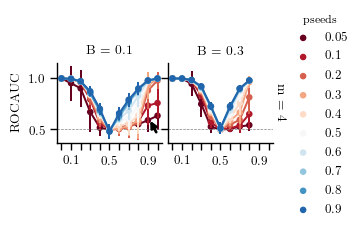

In [7]:
fn = None
viz.plot_rocauc_vs_homophily_per_B_m_pseeds(df_rq1.query("N==2000 & m==4"), columns, fn=fn)

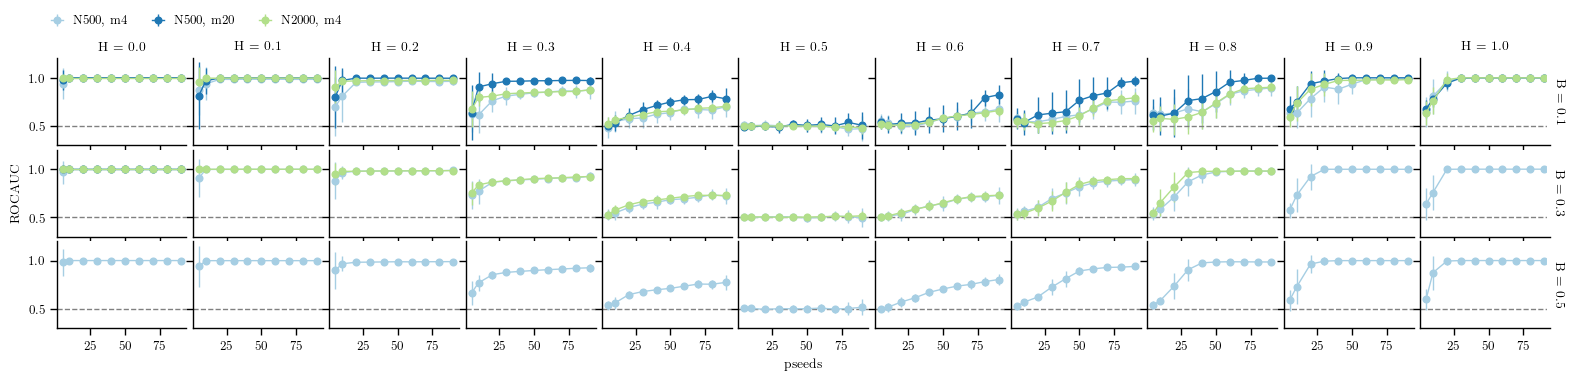

In [8]:
fn = None
viz.plot_rocauc_vs_pseeds_per_B_N_m(df_rq1, columns, fn=fn)

<h3>Regression to the mean global performance</h3>

In [9]:
y_observed = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"y_observed.pickle"))
fe_params = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"fe_params.pickle"))
random_effects = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"random_effects.pickle"))
mdf = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"mdf.pickle"))
X = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"X.pickle"))
Y = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"Y.pickle"))
Z = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"Z.pickle"))

/bigdata/lespin/Network-Unbiased-Inference/results/_mixed_effects/y_observed.pickle loaded!
/bigdata/lespin/Network-Unbiased-Inference/results/_mixed_effects/fe_params.pickle loaded!
/bigdata/lespin/Network-Unbiased-Inference/results/_mixed_effects/random_effects.pickle loaded!
/bigdata/lespin/Network-Unbiased-Inference/results/_mixed_effects/mdf.pickle loaded!
/bigdata/lespin/Network-Unbiased-Inference/results/_mixed_effects/X.pickle loaded!
/bigdata/lespin/Network-Unbiased-Inference/results/_mixed_effects/Y.pickle loaded!
/bigdata/lespin/Network-Unbiased-Inference/results/_mixed_effects/Z.pickle loaded!


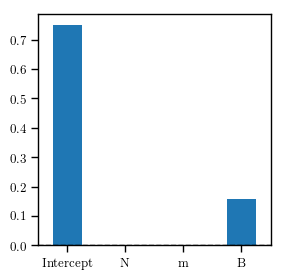

In [10]:
fn = None
viz.plot_fixed_effects(fe_params, fn)

In [11]:
fn = None
viz.plot_random_effects(random_effects, columns, fn)

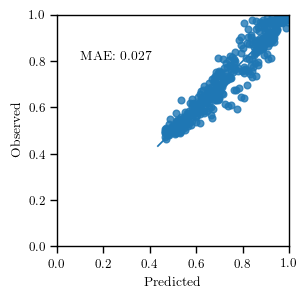

In [12]:
fn = None
viz.plot_fitted_line(mdf, y_observed, fn)

The MSE of LMM is 0.0014456149937220086
The RMSE of LMM is 0.03802124397914945
The MAE of LMM is 0.02701407478639341


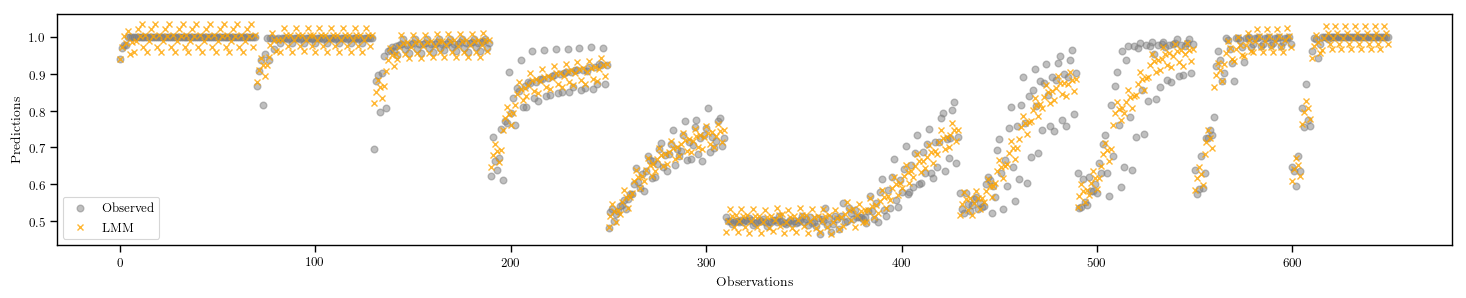

In [13]:
fn = None
viz.plot_prediction(X, Y, Z, fe_params, random_effects, fn)

<h3>Real World vs. Model</h3>

<h2>--- RQ2 ---</h2>

In [14]:
df_rq2 = df_results.query("kind=='BAH' & N==2000 & m==4 & H in [0.2, 0.5, 0.8]")
df_rq2.head()

,kind,N,m,B,H,i,x,sampling,pseeds,epoch,n,e,min\_{degree},ROCAUC,mae,ccm,ccM,bias,lag,network\_{size}
600,BAH,2000,4,0.1,0.2,3,5,nodes,0.70,1,2000,7984,4,0.958483,0.056667,0.666667,0.972376,0.406742,646.131746,"N2000, m4"
601,BAH,2000,4,0.1,0.2,3,5,nodes,0.70,10,2000,7984,4,0.952907,0.060000,0.702128,0.960217,0.422372,600.032226,"N2000, m4"
602,BAH,2000,4,0.1,0.2,3,5,nodes,0.05,8,2000,7984,4,0.950820,0.085263,0.531915,0.956776,0.357304,2152.056350,"N2000, m4"
603,BAH,2000,4,0.1,0.2,3,5,nodes,0.05,7,2000,7984,4,0.957751,0.095263,0.456989,0.953326,0.324034,1940.727153,"N2000, m4"
604,BAH,2000,4,0.1,0.2,3,5,nodes,0.30,6,2000,7984,4,0.959262,0.061429,0.625000,0.974522,0.390742,1553.635144,"N2000, m4"


<h3>Global performance</h3>

<h3>Quality of estimates</h3>

<h3>Utility of estimates</h3>

<h2>--- RQ3 ---</h2>

In [15]:
df_rq3 = df_results.query("kind=='BAH' & N==2000 & m==4 & H in [0.2, 0.5, 0.8] and pseeds < 0.4")
df_rq3.head()

,kind,N,m,B,H,i,x,sampling,pseeds,epoch,n,e,min\_{degree},ROCAUC,mae,ccm,ccM,bias,lag,network\_{size}
602,BAH,2000,4,0.1,0.2,3,5,nodes,0.05,8,2000,7984,4,0.950820,0.085263,0.531915,0.956776,0.357304,2152.056350,"N2000, m4"
603,BAH,2000,4,0.1,0.2,3,5,nodes,0.05,7,2000,7984,4,0.957751,0.095263,0.456989,0.953326,0.324034,1940.727153,"N2000, m4"
604,BAH,2000,4,0.1,0.2,3,5,nodes,0.30,6,2000,7984,4,0.959262,0.061429,0.625000,0.974522,0.390742,1553.635144,"N2000, m4"
605,BAH,2000,4,0.1,0.2,3,5,nodes,0.20,10,2000,7984,4,0.958340,0.061875,0.566265,0.981172,0.365937,1771.839343,"N2000, m4"
607,BAH,2000,4,0.1,0.2,3,5,nodes,0.05,10,2000,7984,4,0.949361,0.079474,0.708108,0.943440,0.428754,2136.760578,"N2000, m4"


<h3>Fairness</h3>

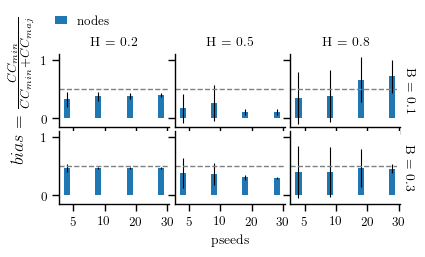

In [16]:
fn = None
viz.plot_bias_vs_pseeds_per_B_H_sampling(df_rq3, columns, fn=fn)